**Table of Contents**

1. [Libraries importing](#imports)
1. [Data Loading](#data-loading)
1. [Data Cleaning and Preprocessing](#data-cleaning)
1. [Exploratory Data Analysis](#EDA)
1. [Predictive Analysis](#predictive)
1. [Conclusions](#conclusions)

# 📖 Libraries Importing <a id='imports'></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', palette='muted')

# 💻 Data Loading <a id='data-loading'></a>

In [14]:
df = pd.read_csv(r'D:\Data analyst\datasets_kaggle\06-10-25\BMW sales data (2010-2024) (1).csv')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


# 🛠 Data Cleaning and Preprocessing <a id='data-cleaning'></a>

**Lowercase columns**

In [16]:
lowercase_cols = []
for col in df.columns:
    new_cols = col.lower()
    lowercase_cols.append(new_cols)

df.columns = lowercase_cols

**Convert data types**

In [17]:
df.head(2)

,model,year,region,color,fuel_type,transmission,engine_size_l,mileage_km,price_usd,sales_volume,sales_classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low


In [18]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['engine_size_l'] = pd.to_numeric(df['engine_size_l'], errors='coerce')
df['mileage_km'] = pd.to_numeric(df['mileage_km'], errors='coerce')
df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')
df['sales_volume'] = pd.to_numeric(df['sales_volume'], errors='coerce')

**Missing values**

In [19]:
df.isnull().sum()

model                   0
year                    0
region                  0
color                   0
fuel_type               0
transmission            0
engine_size_l           0
mileage_km              0
price_usd               0
sales_volume            0
sales_classification    0
dtype: int64

In [20]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(method='ffill', inplace=True)        

# 🕵️‍♂️ Exploratory Data Analysis <a id='EDA'></a>

**Correlation Heatmap**

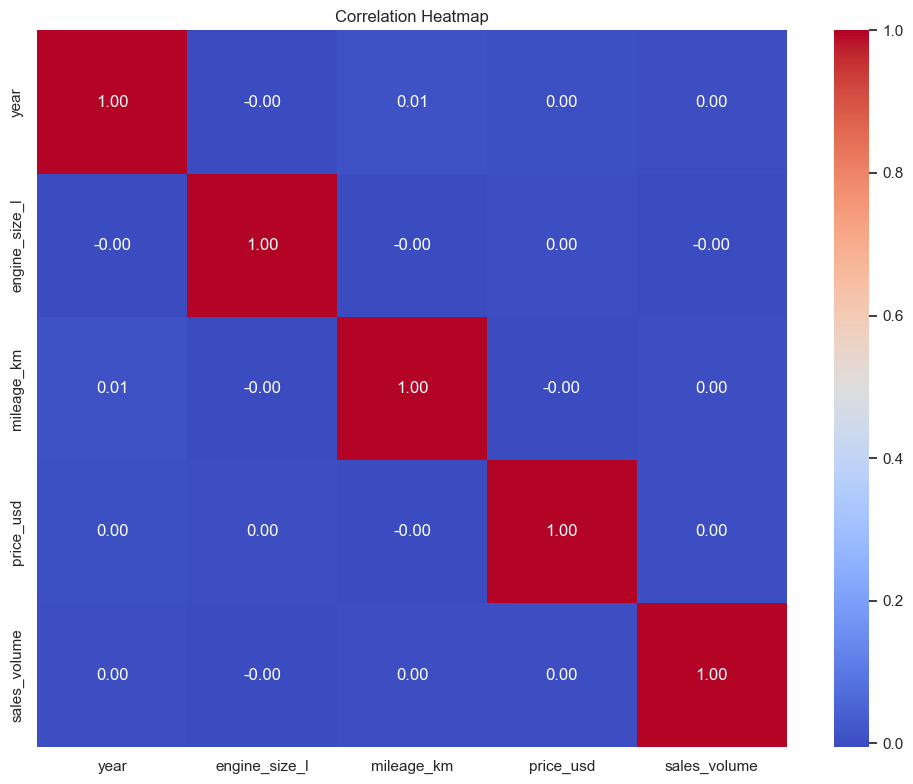

In [21]:
numeric_df = df.select_dtypes(include=[np.number])

if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(10,8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap')    

**Pair plot of the numeric features**

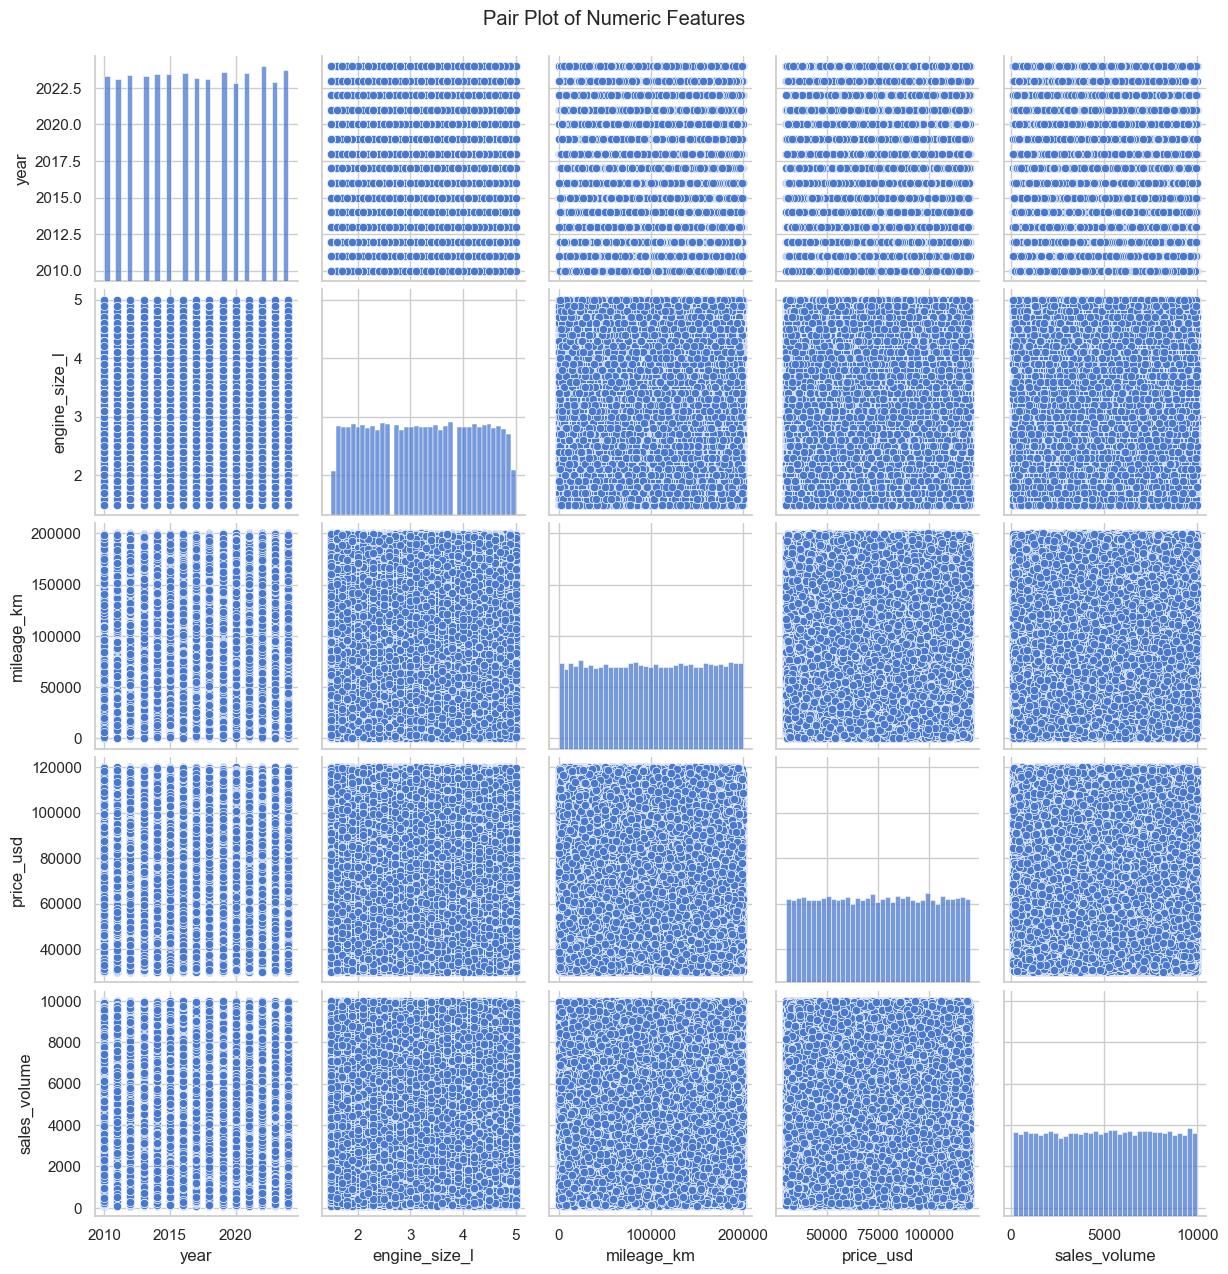

In [25]:
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

**Histogramas for key numerical variables**

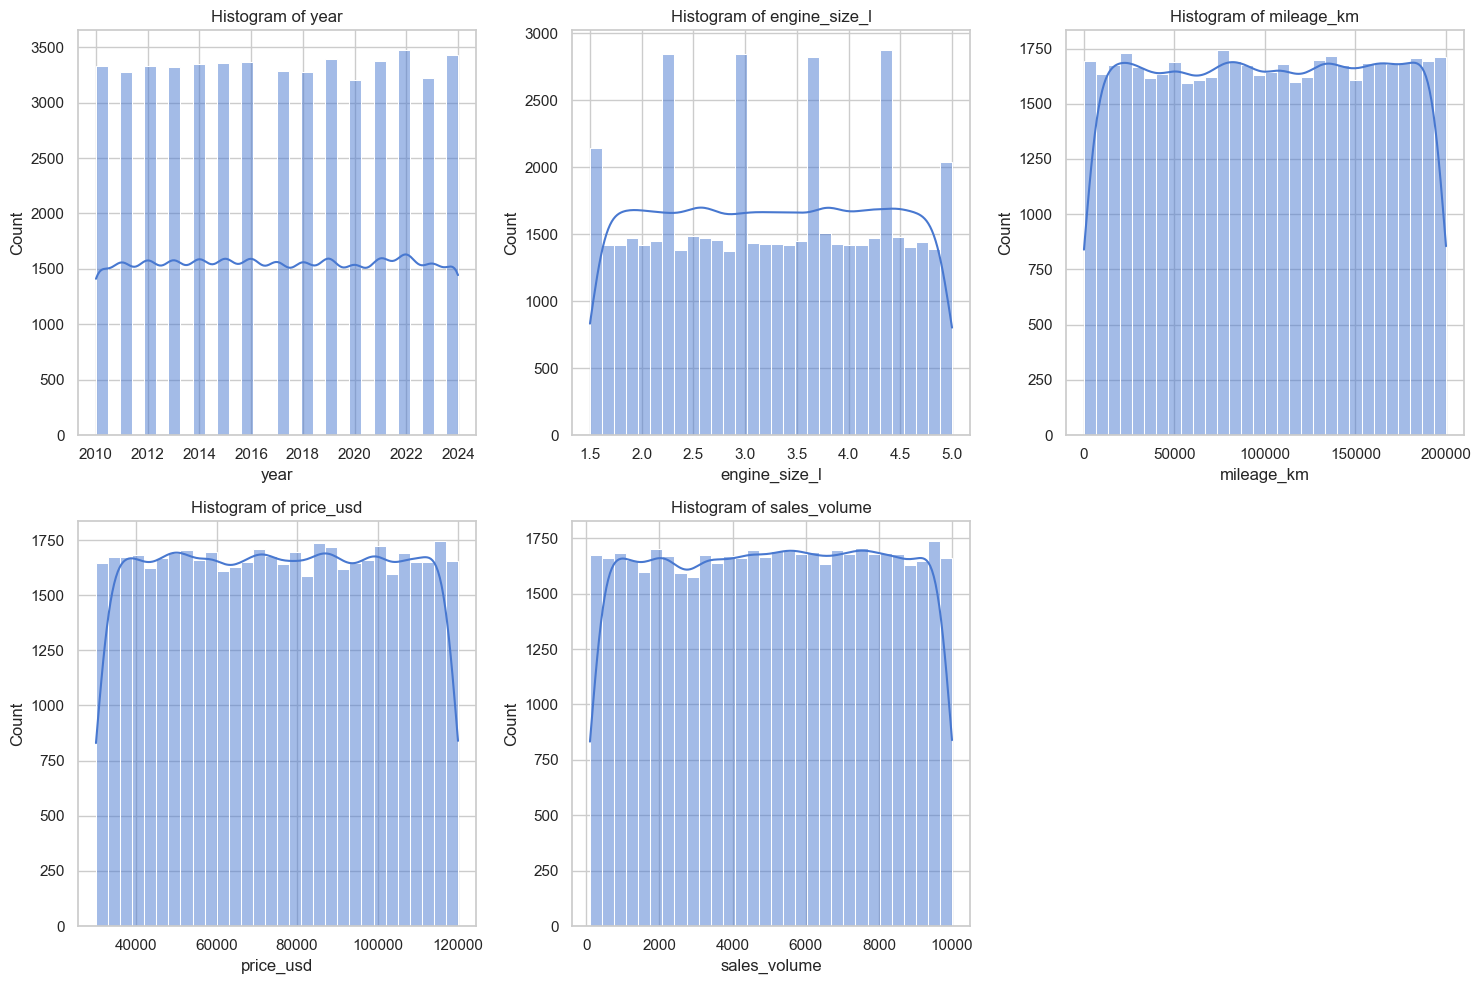

In [22]:
numeric_features = ['year','engine_size_l','mileage_km','price_usd','sales_volume']
plt.figure(figsize=(15,10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


**Count plot for a categorical variable: Sales Classification**

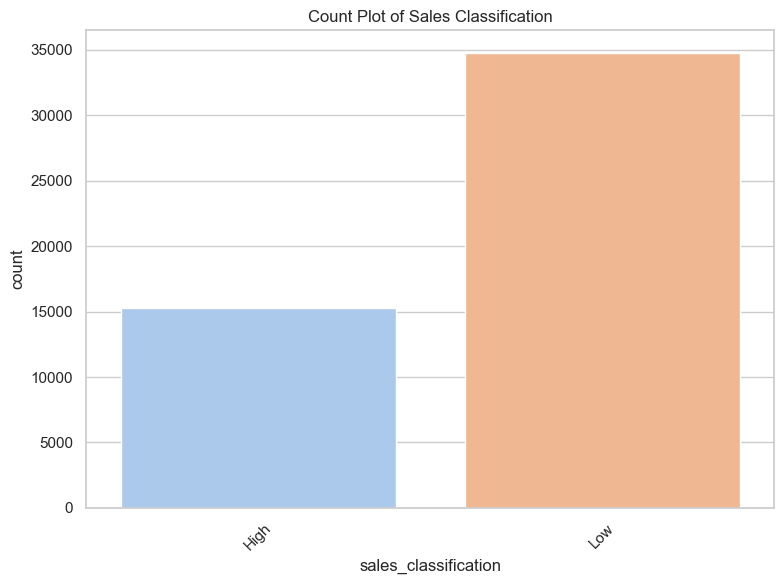

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='sales_classification', data=df, palette='pastel')
plt.title('Count Plot of Sales Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🧠 Predictive Analysis <a id='predictive'></a>

# 🙇‍♂️ Conclusions <a id='conclusions'></a>